# Predicting population in the next 3 years

## Import libraries

In [50]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

## Load students data

In [51]:
students = pd.read_csv('Data/students.csv')
semester_split = students.Semester.str.split()
students['Term'] = [semester_split[i][0] for i in range(len(students))]
students['Year'] = [semester_split[i][1] for i in range(len(students))]

students.head()

,Semester,Total_enrollment,Male,Female,Undergrad,Postbac,Master,Doctoral,Professional,Age_Undergrad_Male,...,Pharm_Male,Pharm_Female,White,Hispanic,Asian_American,African_American,International,Others,Term,Year
0,Spring 2014,37538,18917,18621,28535,1234,4190,2039,1540,23.4,...,163,278,11478,9686,7338,3889,3724,1423,Spring,2014
1,Summer 2014,14797,7198,7599,10463,580,1803,1233,718,24.1,...,92,152,4625,3590,2915,1486,1611,570,Summer,2014
2,Fall 2014,40914,20730,20184,31722,1325,4111,2179,1577,23.1,...,166,293,11855,10994,8215,4173,4025,1652,Fall,2014
3,Spring 2015,39032,19774,19258,30080,1347,3936,2136,1533,23.3,...,166,290,11211,10530,7956,3885,3860,1590,Spring,2015
4,Summer 2015,14216,6747,7469,10915,564,1629,460,648,23.8,...,80,152,4444,3818,2989,1390,964,611,Summer,2015


In [52]:
students.Year = students.Year.astype(float)

In [53]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Semester               33 non-null     object 
 1   Total_enrollment       33 non-null     int64  
 2   Male                   33 non-null     int64  
 3   Female                 33 non-null     int64  
 4   Undergrad              33 non-null     int64  
 5   Postbac                33 non-null     int64  
 6   Master                 33 non-null     int64  
 7   Doctoral               33 non-null     int64  
 8   Professional           33 non-null     int64  
 9   Age_Undergrad_Male     33 non-null     float64
 10  Age_Undergrad_Female   33 non-null     float64
 11  Age_Postbac_Male       33 non-null     float64
 12  Age_Postbac_Female     33 non-null     float64
 13  Age_Master_Male        33 non-null     float64
 14  Age_Master_Female      33 non-null     float64
 15  Age_Doct

In [54]:
students_spring = students[students.Term == 'Spring'].copy()
students_fall = students[students.Term == 'Fall'].copy()
students_summer = students[students.Term == 'Summer'].copy()

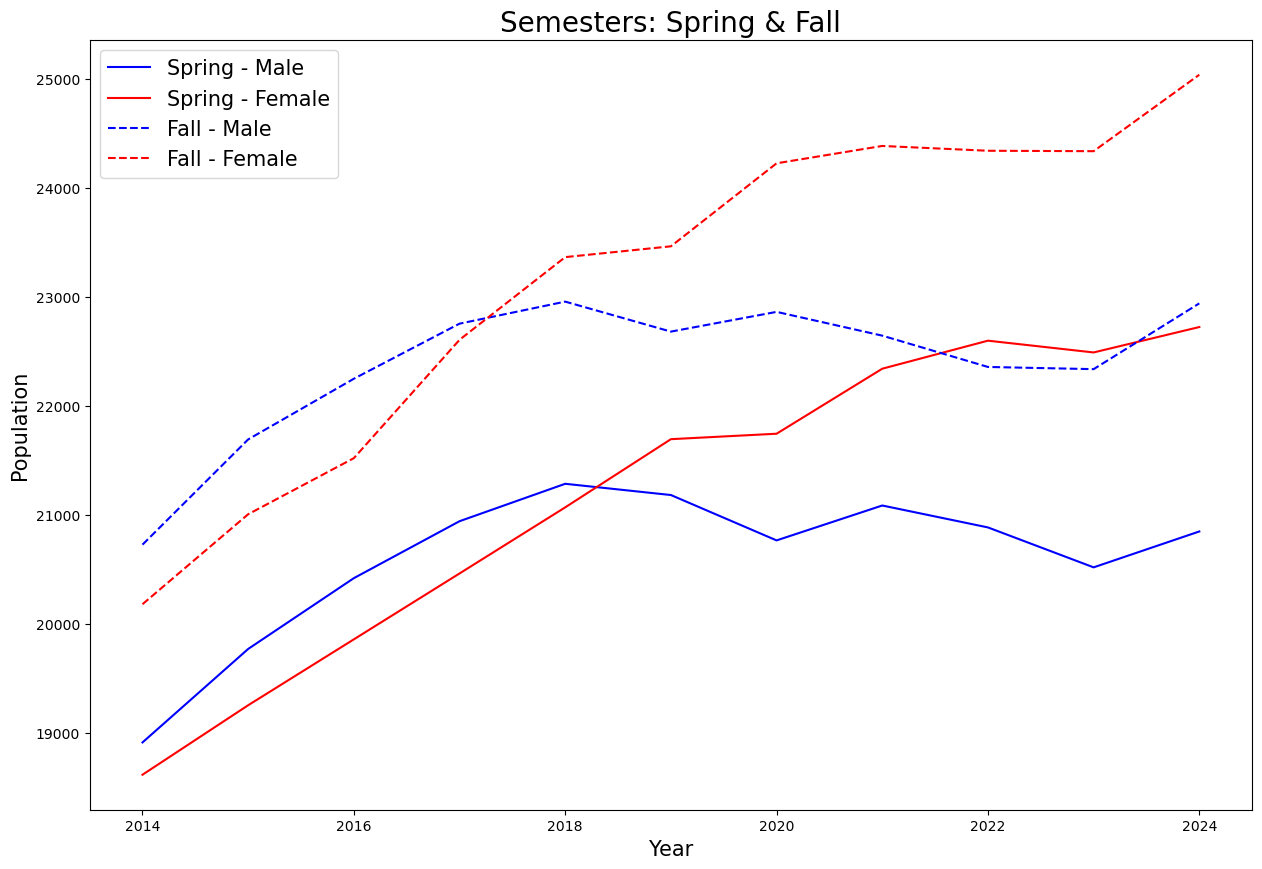

In [55]:
plt.figure(figsize=(15, 10))
plt.plot(students_spring.Year, students_spring.Male, color = 'b', label = 'Spring - Male')
plt.plot(students_spring.Year, students_spring.Female, color = 'r', label = 'Spring - Female')
plt.plot(students_fall.Year, students_fall.Male, linestyle = '--', color = 'b', label = 'Fall - Male')
plt.plot(students_fall.Year, students_fall.Female, linestyle = '--', color = 'r', label = 'Fall - Female')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Semesters: Spring & Fall', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

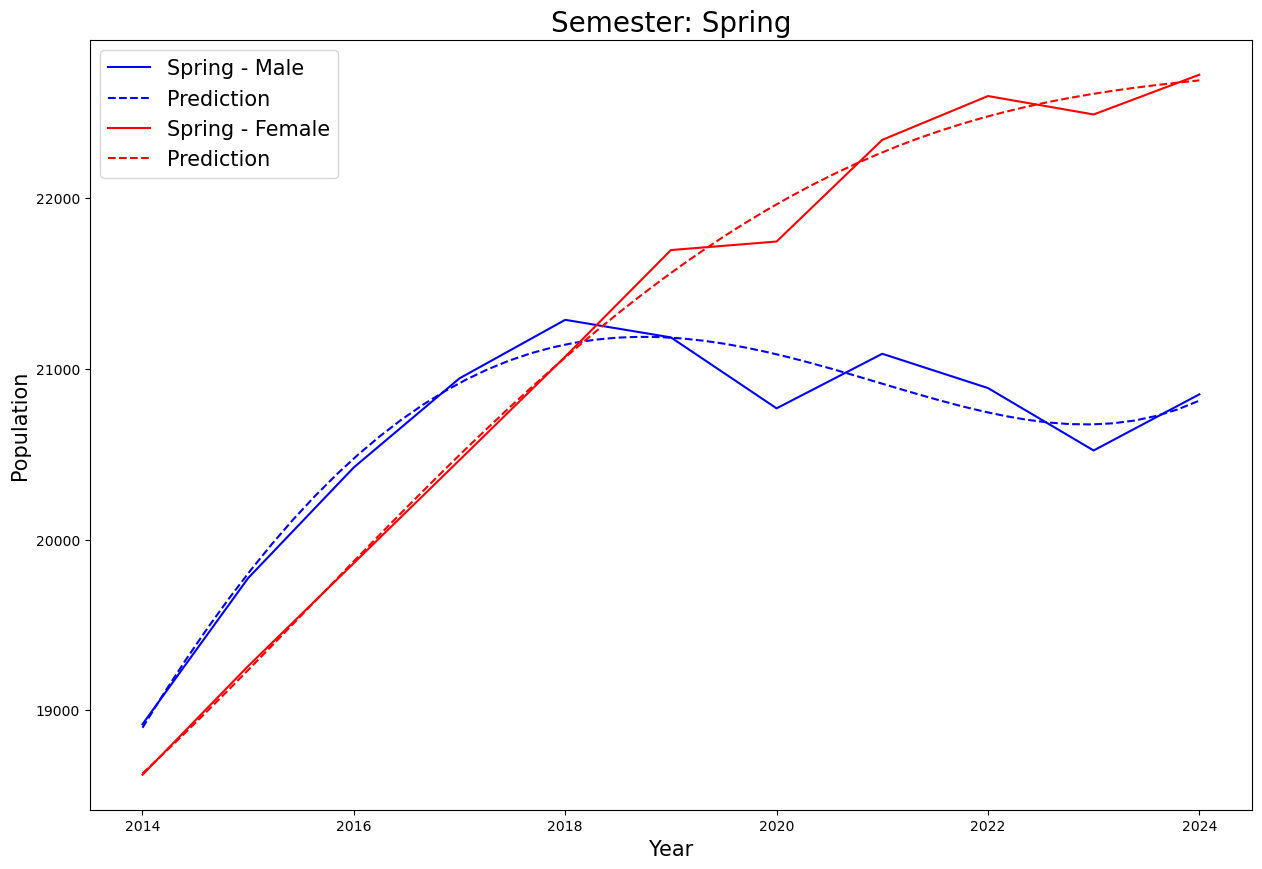

In [56]:
deg = 4
# Create a polynomial function
p_spring_male = np.poly1d(np.polyfit(students_spring.Year, students_spring.Male, deg))
p_spring_female = np.poly1d(np.polyfit(students_spring.Year, students_spring.Female, deg))


# Predict y values for new x values
x_new = np.linspace(2014, 2024)
y_predicted_male = p_spring_male(x_new)
y_predicted_female = p_spring_female(x_new)

plt.figure(figsize=(15, 10))
plt.plot(students_spring.Year, students_spring.Male, color = 'b', label = 'Spring - Male')
plt.plot(x_new,y_predicted_male, linestyle = '--', color = 'b', label = 'Prediction')
plt.plot(students_spring.Year, students_spring.Female, color = 'r', label = 'Spring - Female')
plt.plot(x_new,y_predicted_female, linestyle = '--', color = 'r', label = 'Prediction')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Semester: Spring', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

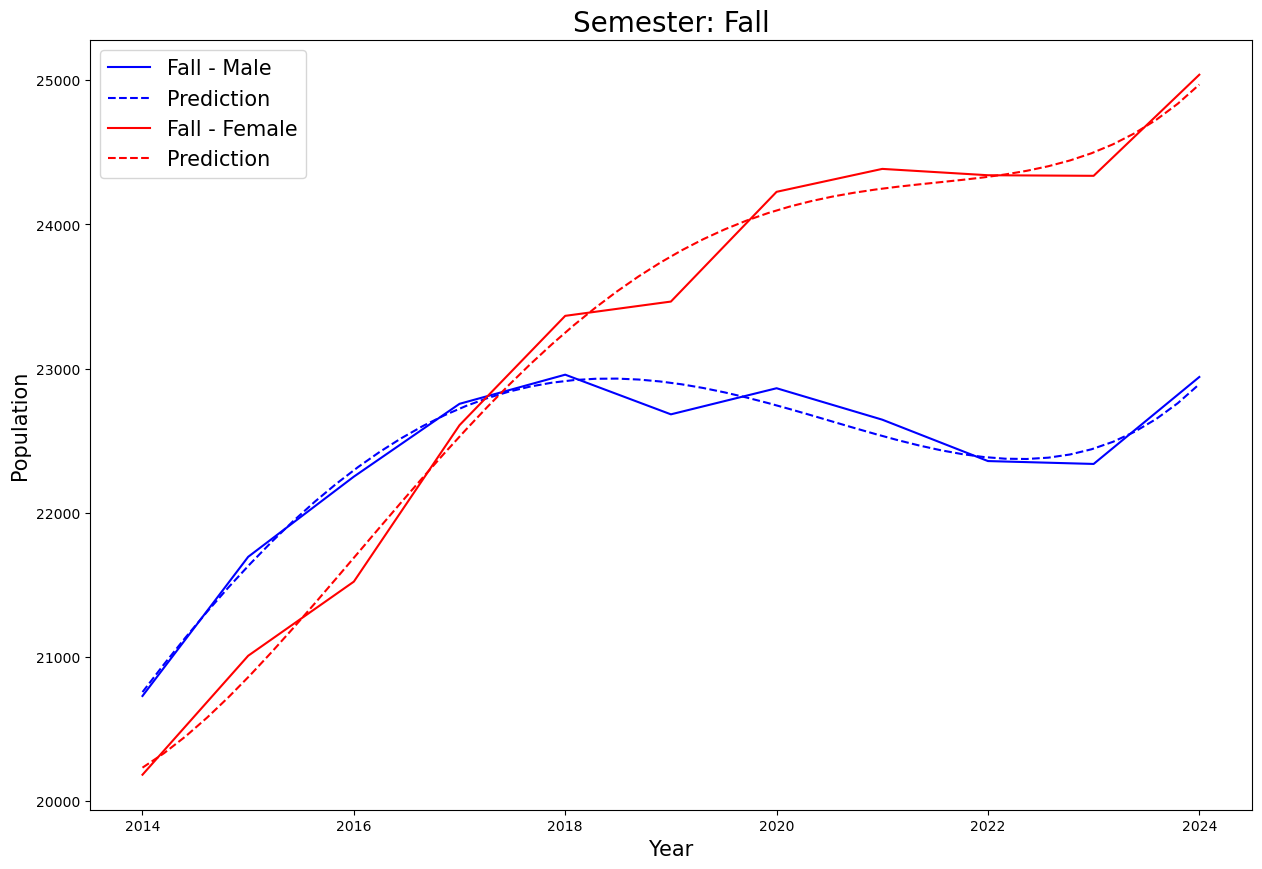

In [57]:
deg = 4
# Create a polynomial function
p_fall_male = np.poly1d(np.polyfit(students_fall.Year, students_fall.Male, deg))
p_fall_female = np.poly1d(np.polyfit(students_fall.Year, students_fall.Female, deg))


# Predict y values for new x values
x_new = np.linspace(2014, 2024)
y_predicted_male = p_fall_male(x_new)
y_predicted_female = p_fall_female(x_new)

plt.figure(figsize=(15, 10))
plt.plot(students_fall.Year, students_fall.Male, color = 'b', label = 'Fall - Male')
plt.plot(x_new,y_predicted_male, linestyle = '--', color = 'b', label = 'Prediction')
plt.plot(students_fall.Year, students_fall.Female, color = 'r', label = 'Fall - Female')
plt.plot(x_new,y_predicted_female, linestyle = '--', color = 'r', label = 'Prediction')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Semester: Fall', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

In [58]:
students_spring.head()

,Semester,Total_enrollment,Male,Female,Undergrad,Postbac,Master,Doctoral,Professional,Age_Undergrad_Male,...,Pharm_Male,Pharm_Female,White,Hispanic,Asian_American,African_American,International,Others,Term,Year
0,Spring 2014,37538,18917,18621,28535,1234,4190,2039,1540,23.4,...,163,278,11478,9686,7338,3889,3724,1423,Spring,2014.0
3,Spring 2015,39032,19774,19258,30080,1347,3936,2136,1533,23.3,...,166,290,11211,10530,7956,3885,3860,1590,Spring,2015.0
6,Spring 2016,40285,20423,19862,31374,1425,3852,2096,1538,23.2,...,167,299,11129,11118,8284,3959,3880,1915,Spring,2016.0
9,Spring 2017,41411,20945,20466,32502,1303,3927,2122,1557,23.1,...,164,323,11080,12084,8638,3974,3714,1921,Spring,2017.0
12,Spring 2018,42360,21288,21072,33683,1131,3819,2143,1584,22.9,...,180,321,10884,13042,8757,4090,3511,2076,Spring,2018.0


In [59]:
## KNN

## make model objects
knn_2 = KNeighborsRegressor(2)
knn_5 = KNeighborsRegressor(5)

## Fit the models
knn_2.fit(students_spring[['Year']], students_spring.Male)
knn_5.fit(students_spring[['Year']], students_spring.Male)

KNeighborsRegressor()

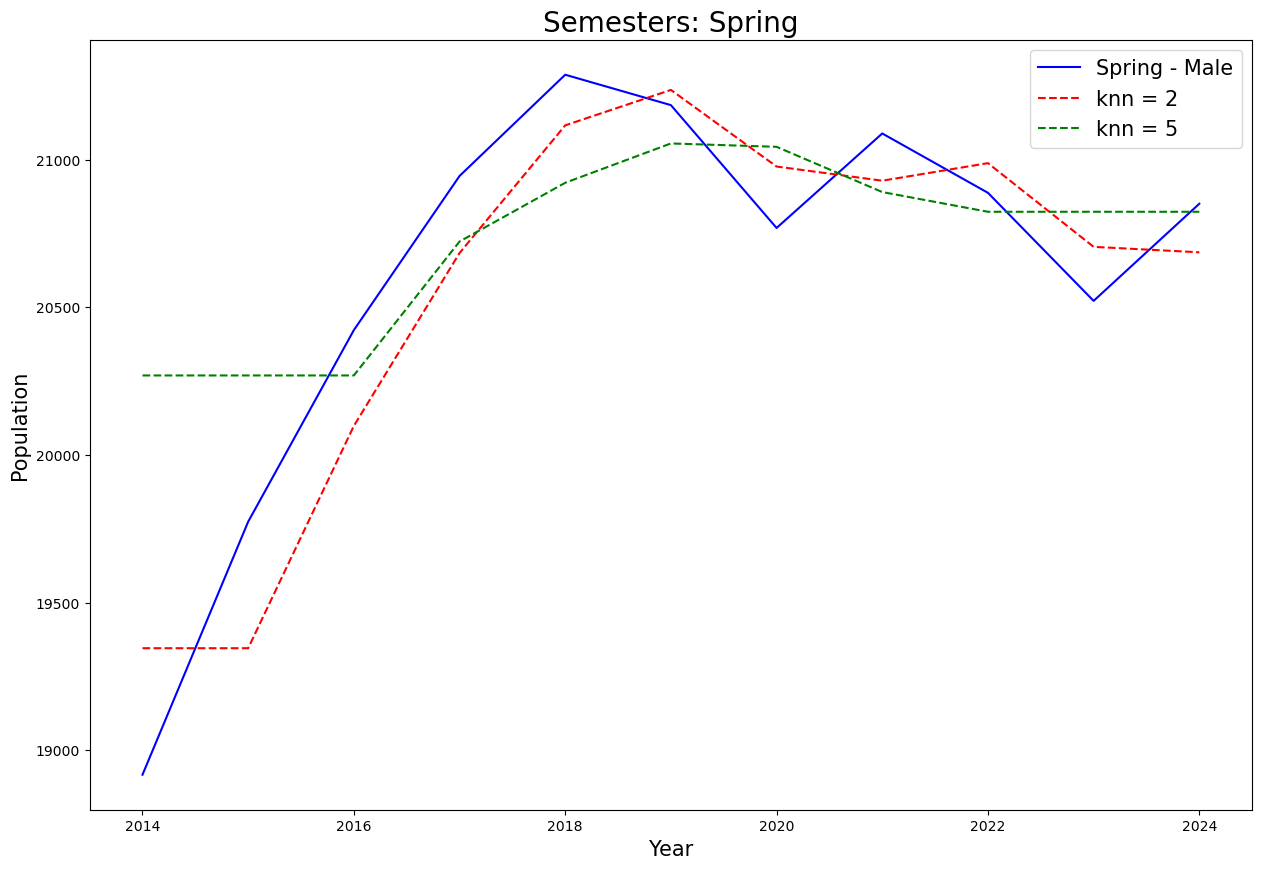

In [60]:
plt.figure(figsize=(15, 10))
plt.plot(students_spring.Year, students_spring.Male, color = 'b', label = 'Spring - Male')
plt.plot(students_spring.Year, knn_2.predict(students_spring[['Year']]), linestyle = '--', color = 'r', label = 'knn = 2')
plt.plot(students_spring.Year, knn_5.predict(students_spring[['Year']]), linestyle = '--', color = 'g', label = 'knn = 5')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('Semesters: Spring', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

## Undergrad Male & Undergrad Female

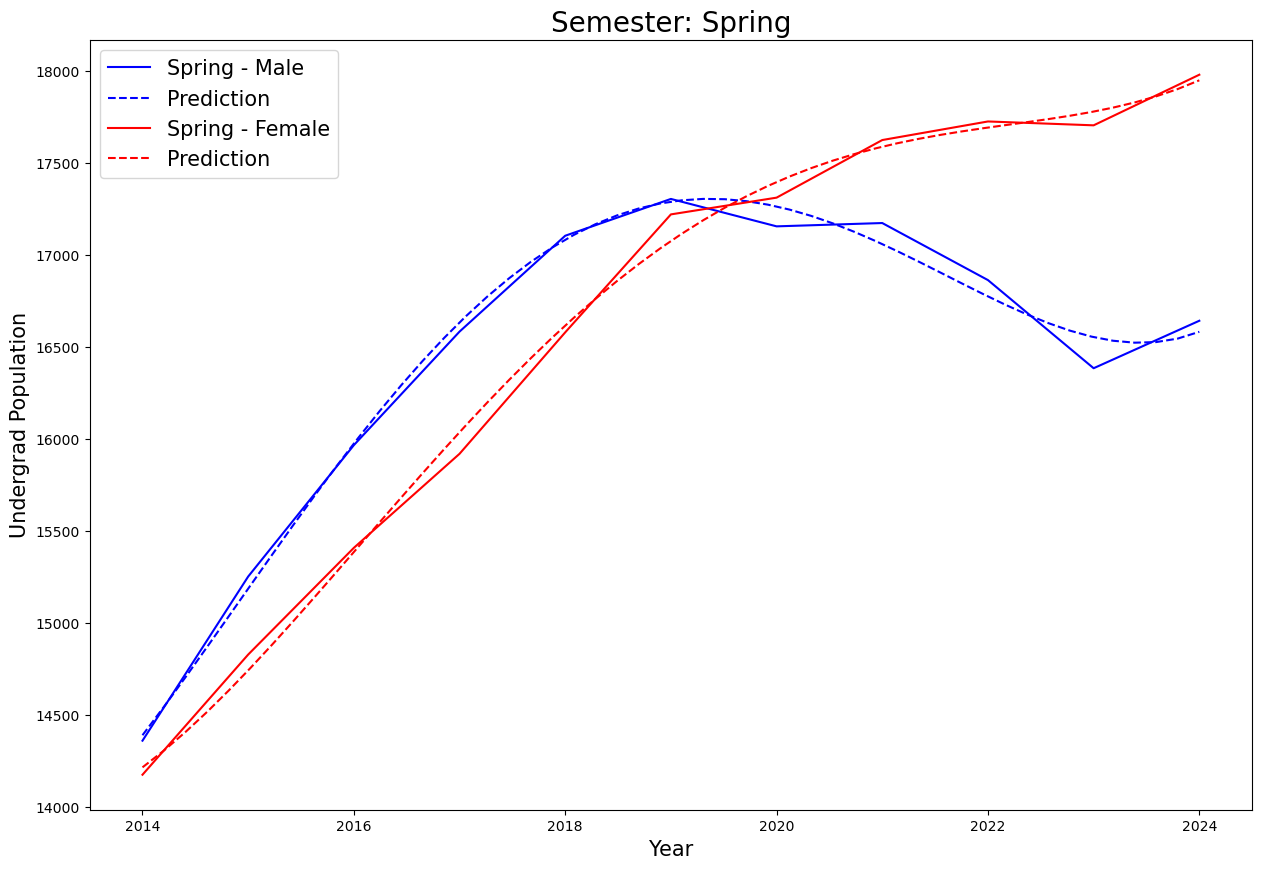

In [61]:
deg = 4
# Create a polynomial function
p_spring_male = np.poly1d(np.polyfit(students_spring.Year, students_spring.Undergrad_Male, deg))
p_spring_female = np.poly1d(np.polyfit(students_spring.Year, students_spring.Undergrad_Female, deg))


# Predict y values for new x values
x_new = np.linspace(2014, 2024)
y_predicted_male = p_spring_male(x_new)
y_predicted_female = p_spring_female(x_new)

plt.figure(figsize=(15, 10))
plt.plot(students_spring.Year, students_spring.Undergrad_Male, color = 'b', label = 'Spring - Male')
plt.plot(x_new,y_predicted_male, linestyle = '--', color = 'b', label = 'Prediction')
plt.plot(students_spring.Year, students_spring.Undergrad_Female, color = 'r', label = 'Spring - Female')
plt.plot(x_new,y_predicted_female, linestyle = '--', color = 'r', label = 'Prediction')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Undergrad Population', fontsize=15)
plt.title('Semester: Spring', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

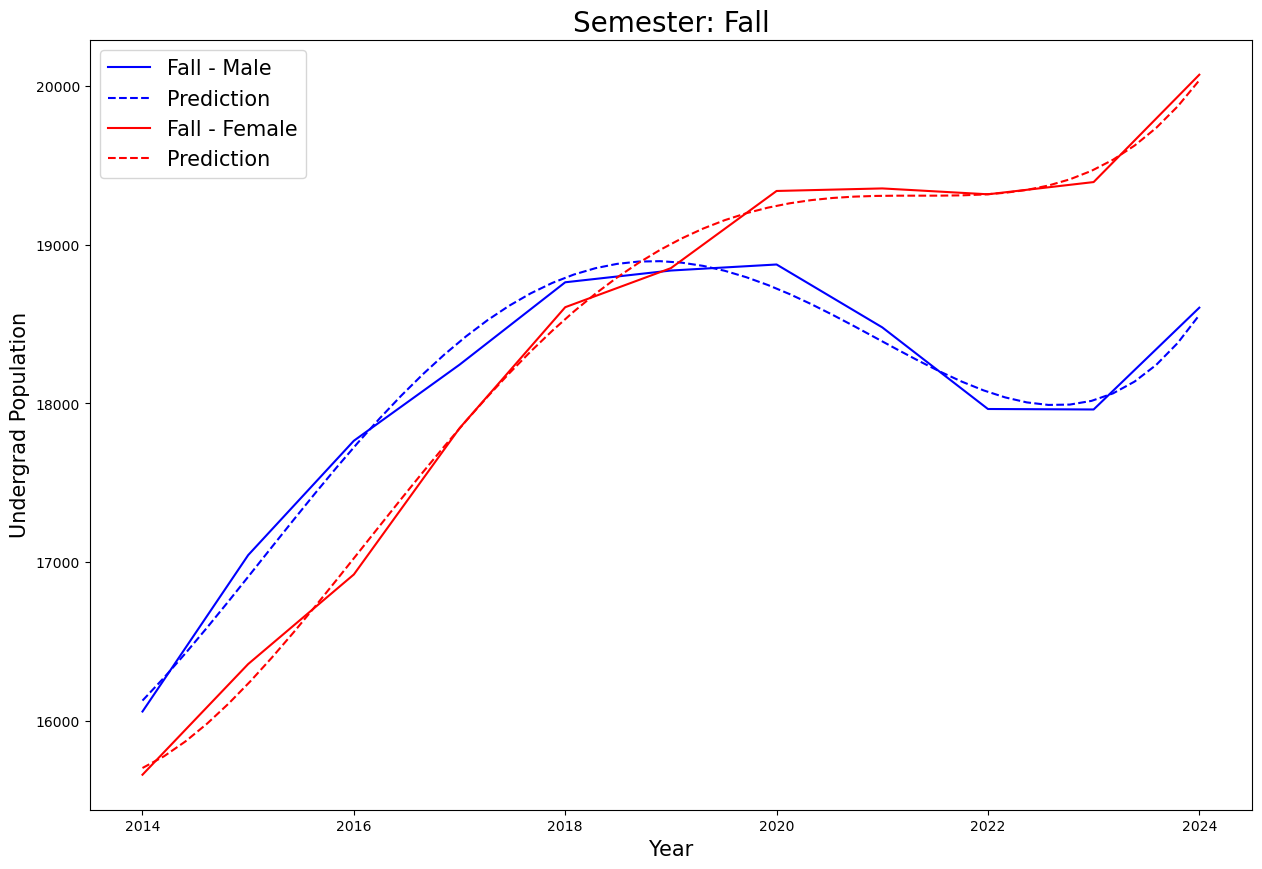

In [62]:
deg = 4
# Create a polynomial function
p_fall_male = np.poly1d(np.polyfit(students_fall.Year, students_fall.Undergrad_Male, deg))
p_fall_female = np.poly1d(np.polyfit(students_fall.Year, students_fall.Undergrad_Female, deg))


# Predict y values for new x values
x_new = np.linspace(2014, 2024)
y_predicted_male = p_fall_male(x_new)
y_predicted_female = p_fall_female(x_new)

plt.figure(figsize=(15, 10))
plt.plot(students_fall.Year, students_fall.Undergrad_Male, color = 'b', label = 'Fall - Male')
plt.plot(x_new,y_predicted_male, linestyle = '--', color = 'b', label = 'Prediction')
plt.plot(students_fall.Year, students_fall.Undergrad_Female, color = 'r', label = 'Fall - Female')
plt.plot(x_new,y_predicted_female, linestyle = '--', color = 'r', label = 'Prediction')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Undergrad Population', fontsize=15)
plt.title('Semester: Fall', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

## Race

In [63]:
def optimize_degree(semester: str, col: str):
    if semester == 'Spring':
        df = students_spring
    elif semester == 'Summer':
        df = students_summer
    elif semester == 'Fall':
        df = students_fall
    else:
        print('Invalid semester')

    mse = []
    for deg in range(1, 5):
        p = np.poly1d(np.polyfit(df.Year, df[col], deg))
        x_new = np.linspace(2014, 2024)
        y_predicted = p(df.Year)  
        mse.append(mean_squared_error(df[col], y_predicted))
    return mse

In [64]:
optimize_degree('Summer', 'White')

[131212.9413223157, 65599.12218798902, 62545.594054788766, 46738.42630421032]

In [65]:
colors = ['r', 'g', 'b', 'c', 'm']

def student_prediction(semester: str, deg: int, col: list):
    if semester == 'Spring':
        df = students_spring
    elif semester == 'Summer':
        df = students_summer
    elif semester == 'Fall':
        df = students_fall
    else:
        print('Invalid semester')

    prediction = {}
    plt.figure(figsize=(15, 10))
    for c in col:
        idx = col.index(c)
        p = np.poly1d(np.polyfit(df.Year, df[c], deg))
        x_new = np.linspace(2014, 2024)
        y_new = p(x_new) 
        prediction[c] = p([2025, 2026, 2027])
        plt.plot(df.Year, df[c], color = colors[idx], label = c)
        plt.plot(x_new, y_new, linestyle = '--', color = colors[idx], label = c + ' Prediction')
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Population', fontsize=15)
    plt.title('Semester: ' + semester, fontsize=20)
    plt.legend(fontsize = 15)
    plt.show()  
    
    return prediction

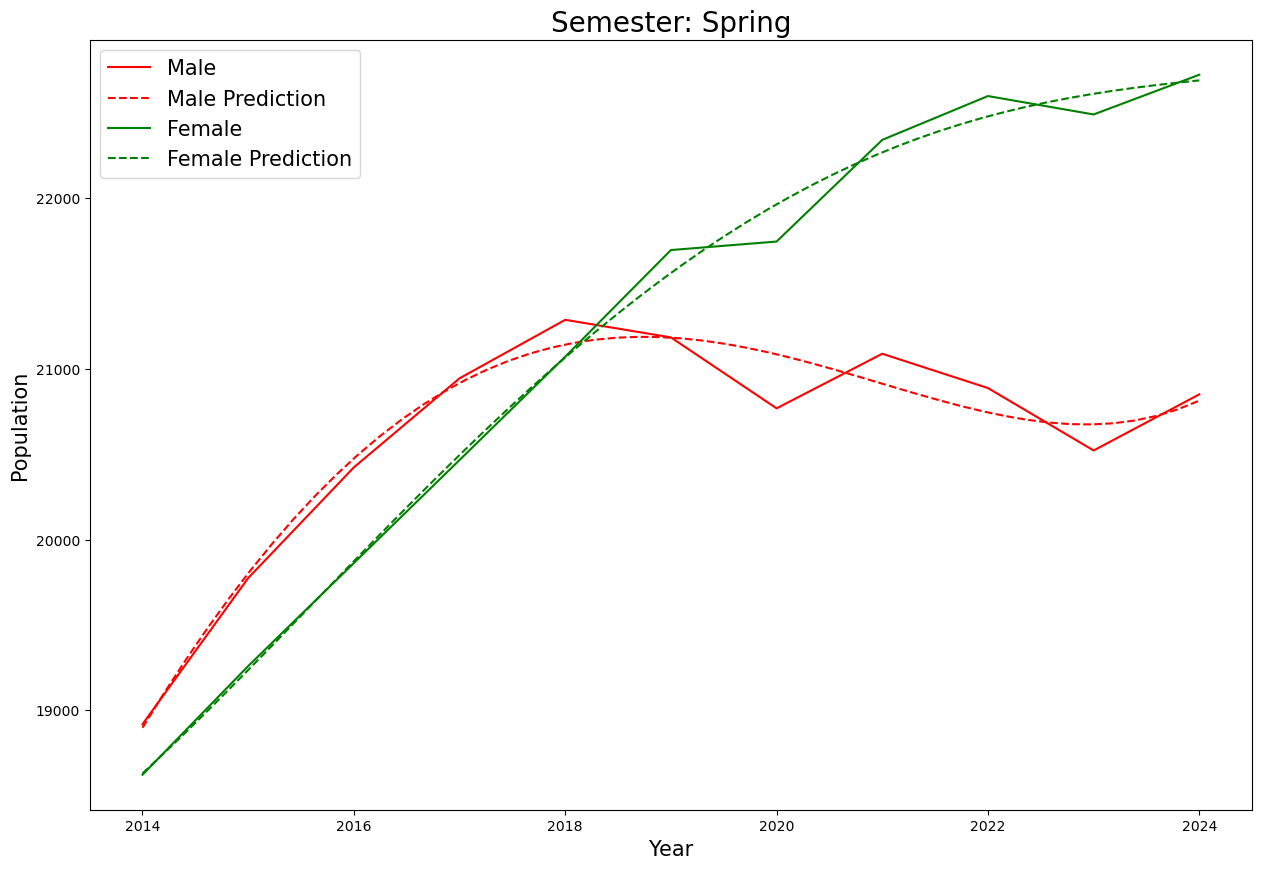

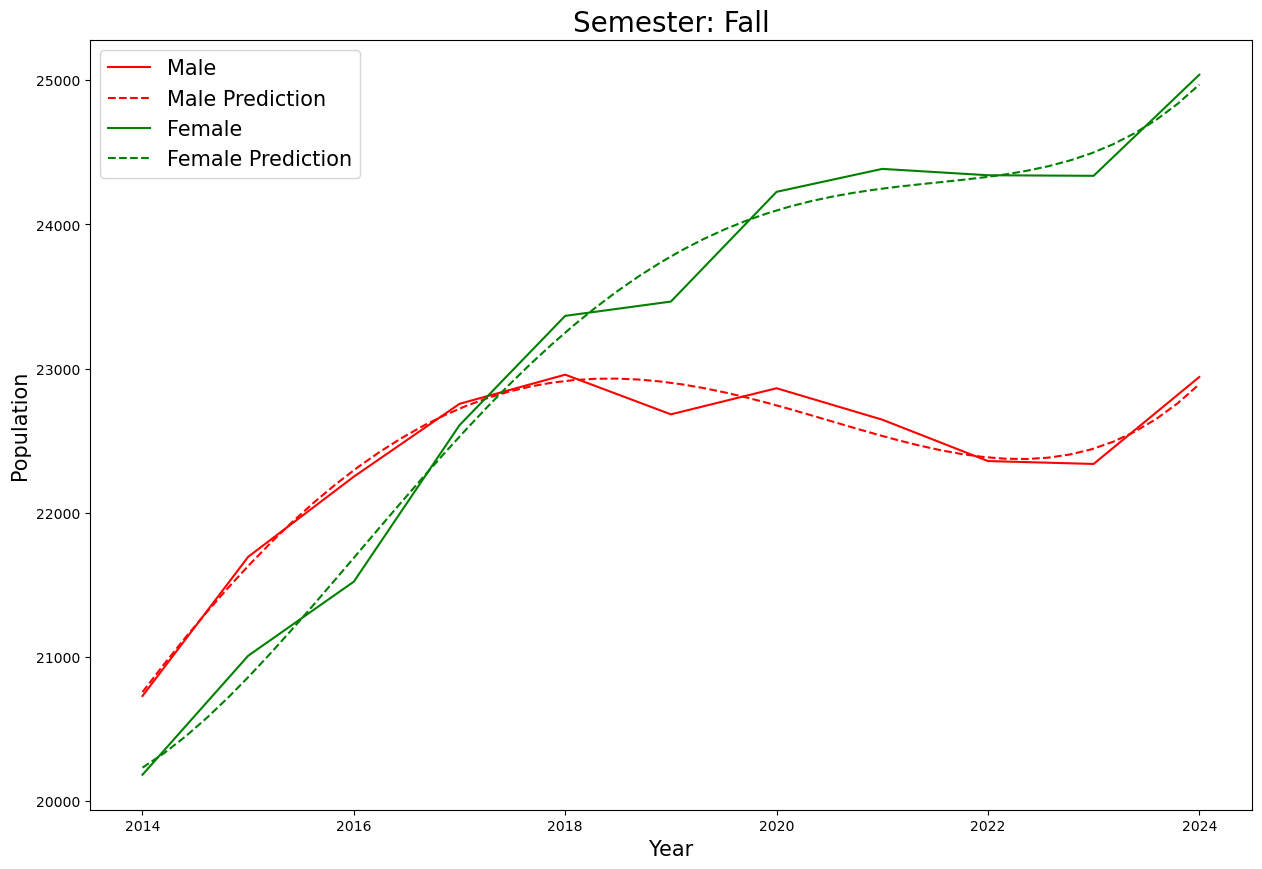

{'Male': array([23931.125     , 25795.546875  , 28748.93359375]),
 'Female': array([26013.71875  , 27960.2265625, 31196.21875  ])}

In [66]:
student_prediction('Spring', 4, ['Male', 'Female'])
student_prediction('Fall', 4, ['Male', 'Female'])

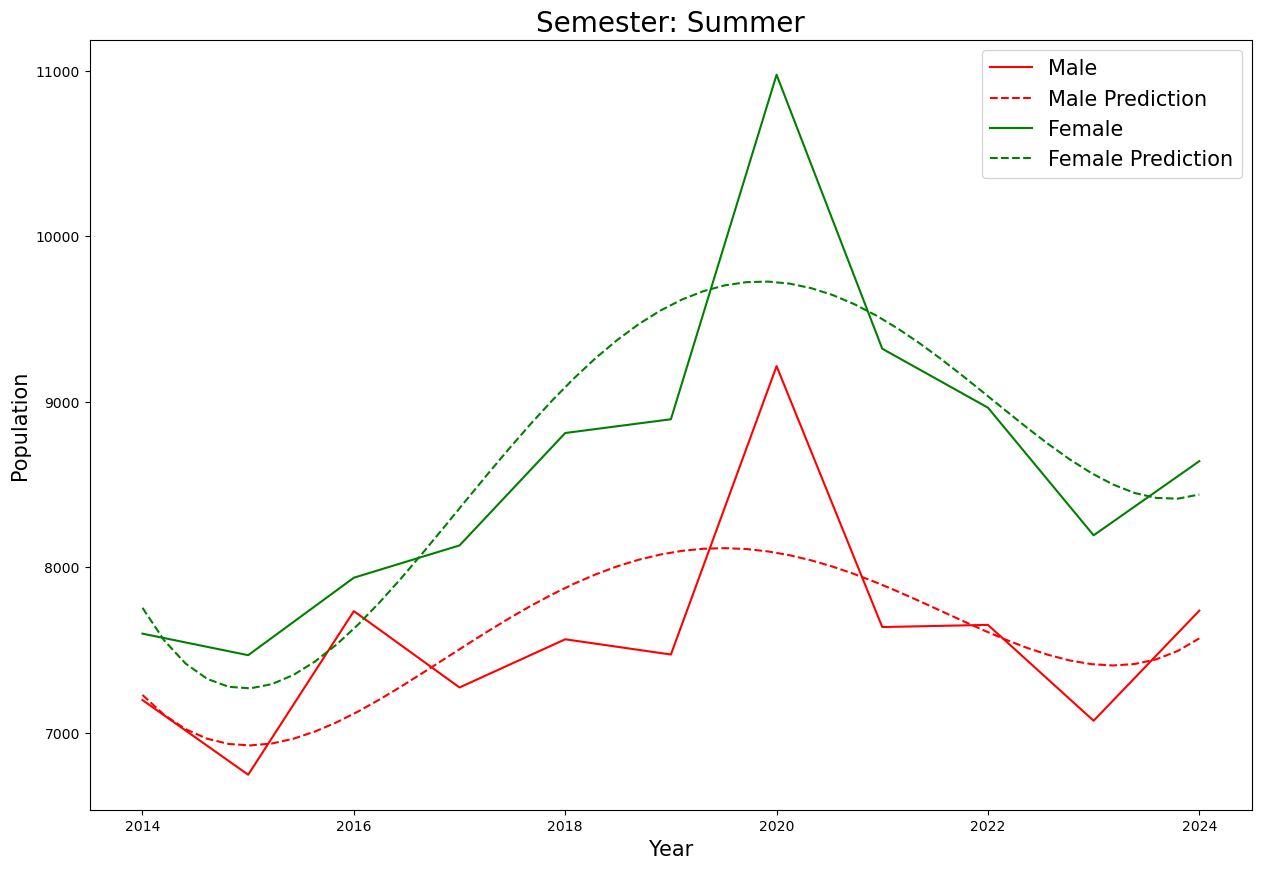

{'Male': array([ 8421.53125  , 10386.9921875, 13968.2421875]),
 'Female': array([ 9145.15625, 11274.4375 , 15543.21875])}

In [67]:
student_prediction('Summer', 4, ['Male', 'Female'])

In [68]:
test = [1, 2, 3]

for t in test:
    print(test.index(t))

0
1
2


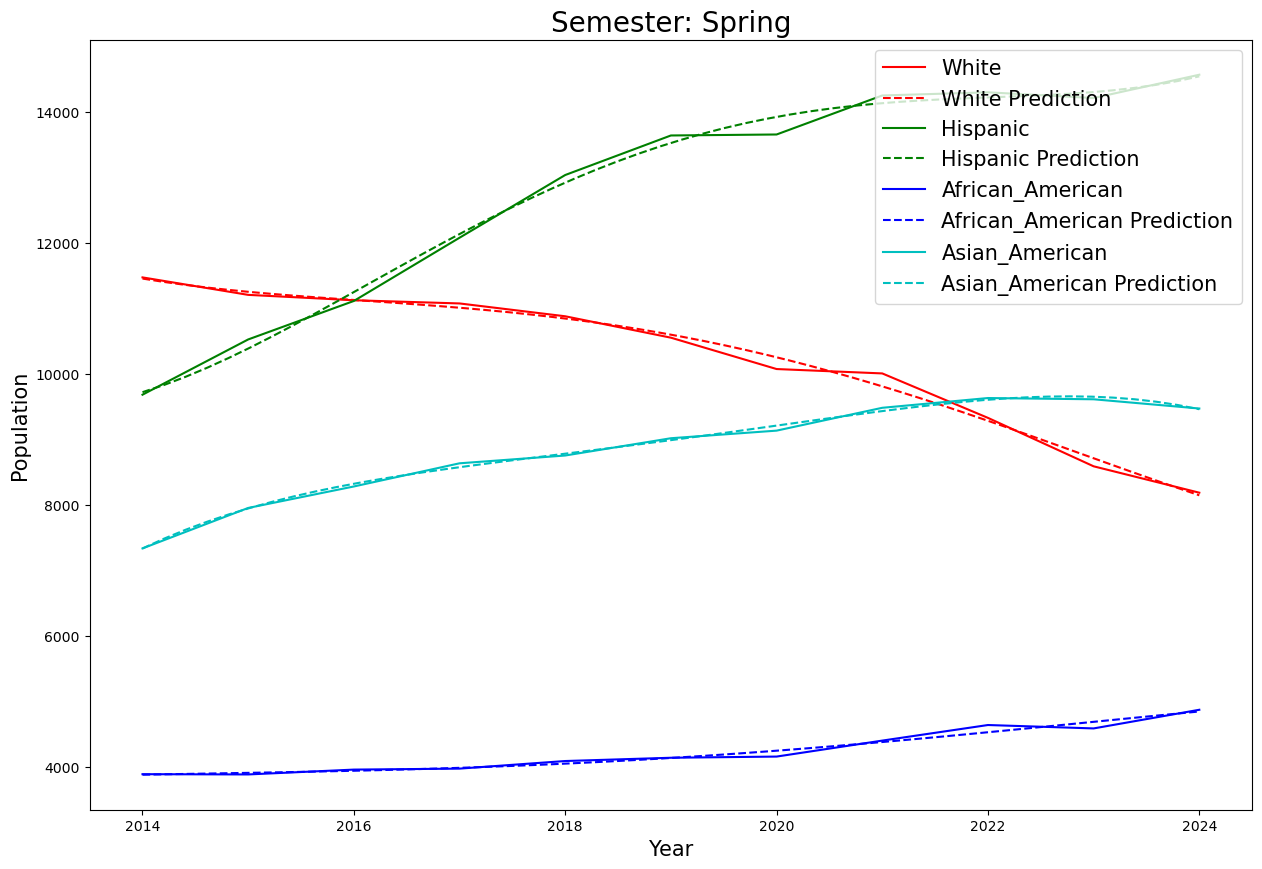

{'White': array([7660.3359375 , 7336.35546875, 7282.89453125]),
 'Hispanic': array([15156.9453125 , 16393.73046875, 18566.875     ]),
 'African_American': array([4990.37670898, 5103.64135742, 5167.60839844]),
 'Asian_American': array([8893.1015625 , 7770.01953125, 5889.96875   ])}

In [69]:
student_prediction('Spring', 4, ['White', 'Hispanic', 'African_American', 'Asian_American'])

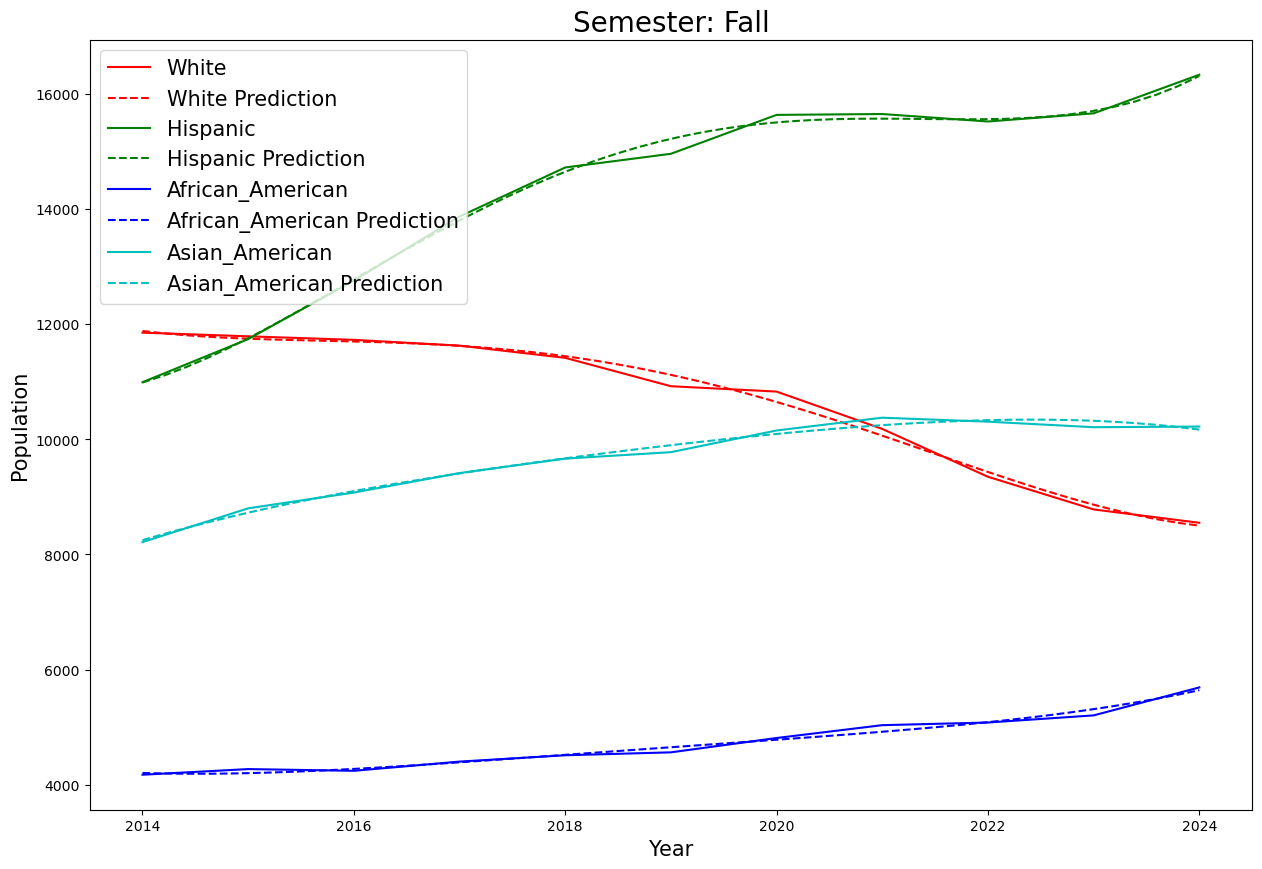

{'White': array([ 8521.4765625,  9141.59375  , 10614.4375   ]),
 'Hispanic': array([17771.3671875, 20547.8984375, 25194.6640625]),
 'African_American': array([6127.515625  , 6836.03417969, 7844.31152344]),
 'Asian_American': array([9819.47460938, 9204.43457031, 8247.47460938])}

In [70]:
student_prediction('Fall', 4, ['White', 'Hispanic', 'African_American', 'Asian_American'])

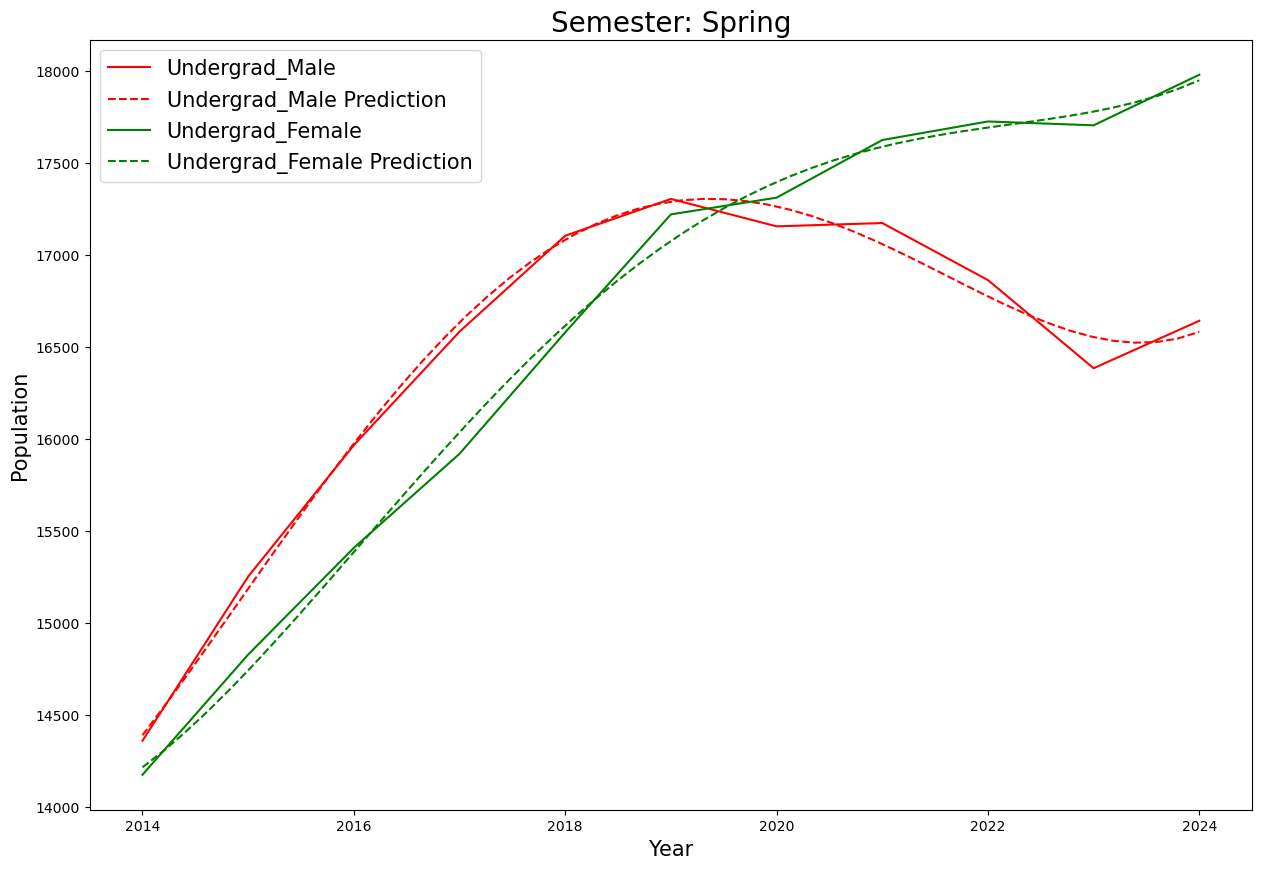

{'Undergrad_Male': array([17092.05859375, 18359.06640625, 20702.7109375 ]),
 'Undergrad_Female': array([18331.703125  , 19088.2421875 , 20408.11328125])}

In [71]:
student_prediction('Spring', 4, ['Undergrad_Male', 'Undergrad_Female'])

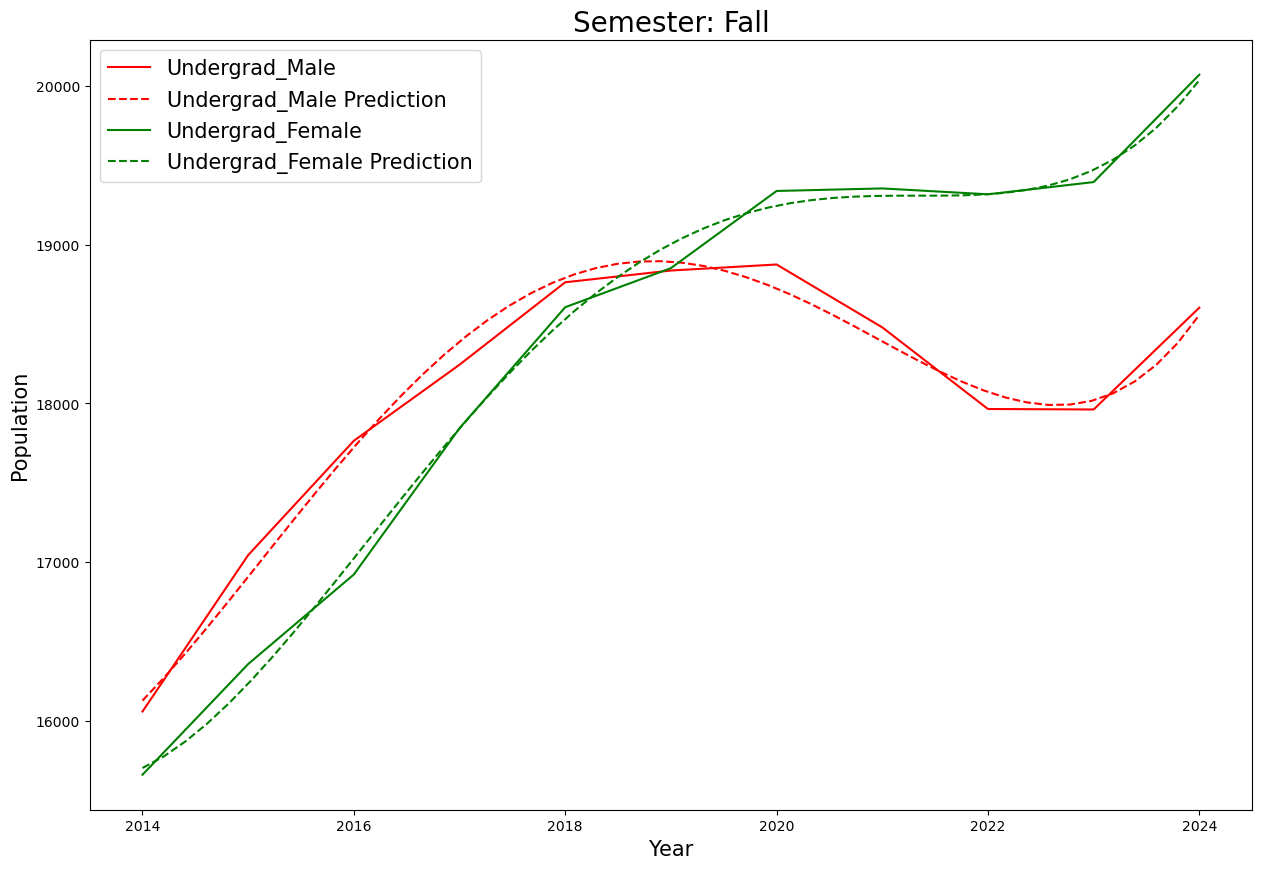

{'Undergrad_Male': array([20080.03125  , 23059.2109375, 28036.5390625]),
 'Undergrad_Female': array([21346.7265625, 23815.1640625, 27919.3203125])}

In [72]:
student_prediction('Fall', 4, ['Undergrad_Male', 'Undergrad_Female'])

## International students

In [73]:
international = pd.read_csv('Data/international_students.csv')
international['Term'] = [semester_split[i][0] for i in range(len(international))]
international['Year'] = [semester_split[i][1] for i in range(len(international))]

international.head()

,Semester,China,India,Vietnam,Nigeria,Saudi_Arabia,South_Korea,Iran,Mexico,Venezuela,...,Taiwan,Turkey,Peru,Pakistan,Nepal,Ukraine,Bangladesh,Sri_Lanka,Term,Year
0,Spring 2014,897,791,340,131,100.0,114.0,101.0,102.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,2014
1,Summer 2014,469,290,78,46,49.0,56.0,74.0,NaN,NaN,...,46.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2014
2,Fall 2014,934,917,320,149,138.0,131.0,124.0,101.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,2014
3,Spring 2015,837,917,306,154,141.0,119.0,140.0,94.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,2015
4,Summer 2015,187,191,49,49,91.0,21.0,NaN,29.0,24.0,...,NaN,NaN,24.0,24.0,NaN,NaN,NaN,NaN,Summer,2015


In [74]:
international = international.dropna(axis=1)

In [75]:
international.head()

,Semester,China,India,Vietnam,Nigeria,Term,Year
0,Spring 2014,897,791,340,131,Spring,2014
1,Summer 2014,469,290,78,46,Summer,2014
2,Fall 2014,934,917,320,149,Fall,2014
3,Spring 2015,837,917,306,154,Spring,2015
4,Summer 2015,187,191,49,49,Summer,2015


In [76]:
international.Year = international.Year.astype(float)
international.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Semester  33 non-null     object 
 1   China     33 non-null     int64  
 2   India     33 non-null     int64  
 3   Vietnam   33 non-null     int64  
 4   Nigeria   33 non-null     int64  
 5   Term      33 non-null     object 
 6   Year      33 non-null     float64
dtypes: float64(1), int64(4), object(2)
memory usage: 1.9+ KB


In [77]:
international_spring = international[international['Term'] == 'Spring'].copy()
international_summer = international[international['Term'] == 'Summer'].copy()
international_fall = international[international['Term'] == 'Fall'].copy()

In [78]:
international_spring.head()

,Semester,China,India,Vietnam,Nigeria,Term,Year
0,Spring 2014,897,791,340,131,Spring,2014.0
3,Spring 2015,837,917,306,154,Spring,2015.0
6,Spring 2016,853,875,312,162,Spring,2016.0
9,Spring 2017,786,809,324,139,Spring,2017.0
12,Spring 2018,711,774,344,133,Spring,2018.0


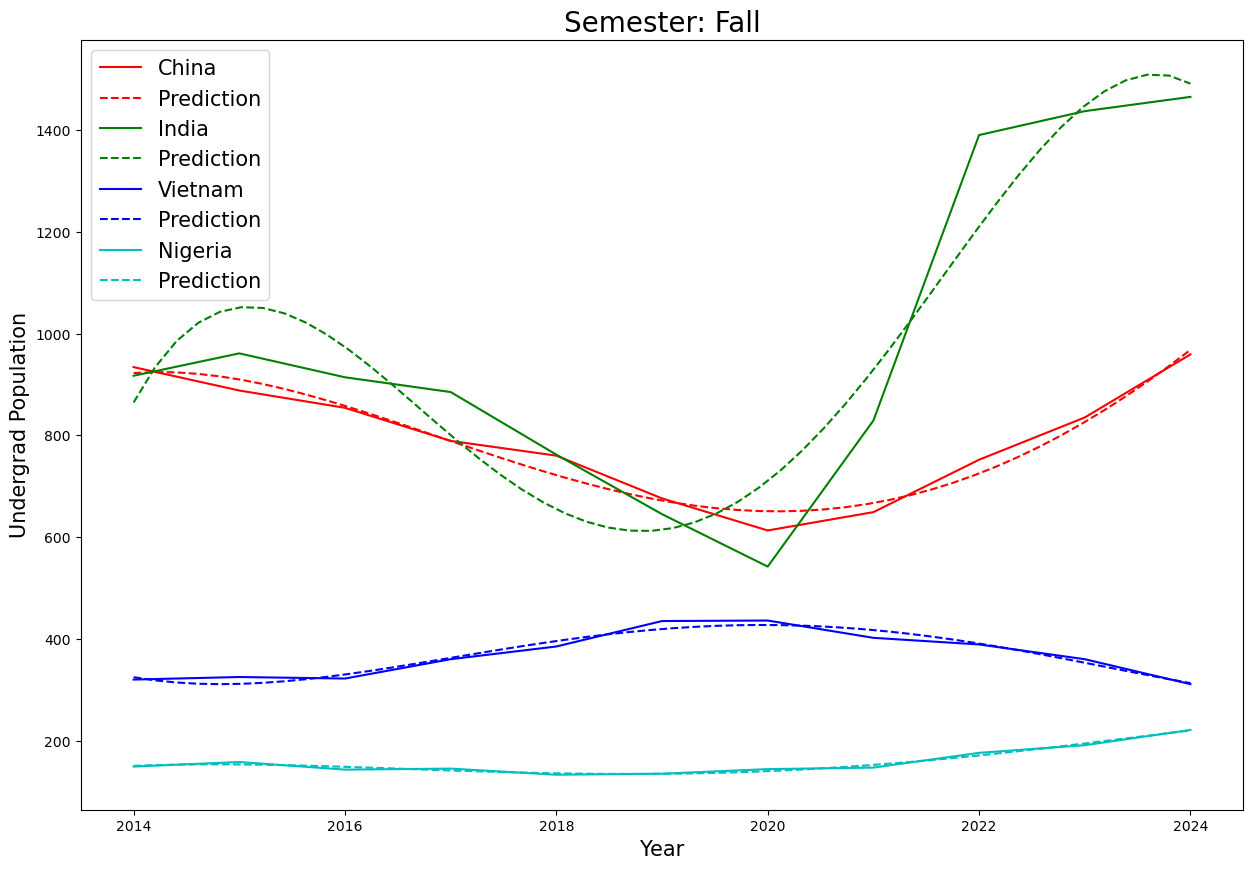

In [79]:
deg = 4
# Create a polynomial function
p_china = np.poly1d(np.polyfit(international_fall.Year, international_fall.China, deg))
p_india = np.poly1d(np.polyfit(international_fall.Year, international_fall.India, 4))
p_vietnam = np.poly1d(np.polyfit(international_fall.Year, international_fall.Vietnam, deg))
p_nigeria = np.poly1d(np.polyfit(international_fall.Year, international_fall.Nigeria, deg))


# Predict y values for new x values
x_new = np.linspace(2014, 2024)
y_china = p_china(x_new)
y_india = p_india(x_new)
y_vietnam = p_vietnam(x_new)
y_nigeria = p_nigeria(x_new)

plt.figure(figsize=(15, 10))
plt.plot(international_fall.Year, international_fall.China, color = colors[0], label = 'China')
plt.plot(x_new, y_china, linestyle = '--', color = colors[0], label = 'Prediction')
plt.plot(international_fall.Year, international_fall.India, color = colors[1], label = 'India')
plt.plot(x_new, y_india, linestyle = '--', color = colors[1], label = 'Prediction')
plt.plot(international_fall.Year, international_fall.Vietnam, color = colors[2], label = 'Vietnam')
plt.plot(x_new, y_vietnam, linestyle = '--', color = colors[2], label = 'Prediction')
plt.plot(international_fall.Year, international_fall.Nigeria, color = colors[3], label = 'Nigeria')
plt.plot(x_new, y_nigeria, linestyle = '--', color = colors[3], label = 'Prediction')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Undergrad Population', fontsize=15)
plt.title('Semester: Fall', fontsize=20)
plt.legend(fontsize = 15)
plt.show()

In [80]:
def international_prediction(semester: str, deg: int, col: list):
    if semester == 'Spring':
        df = international_spring
    elif semester == 'Summer':
        df = international_summer
    elif semester == 'Fall':
        df = international_fall
    else:
        print('Invalid semester')

    prediction = {}
    plt.figure(figsize=(15, 10))
    for c in col:
        idx = col.index(c)
        p = np.poly1d(np.polyfit(df.Year, df[c], deg))
        x_new = np.linspace(2014, 2024)
        y_new = p(x_new) 
        prediction[c] = p([2025, 2026, 2027])
        plt.plot(df.Year, df[c], color = colors[idx], label = c)
        plt.plot(x_new, y_new, linestyle = '--', color = colors[idx], label = c + ' Prediction')
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Population', fontsize=15)
    plt.title('Semester: ' + semester, fontsize=20)
    plt.legend(fontsize = 15)
    plt.show()  
    
    return prediction

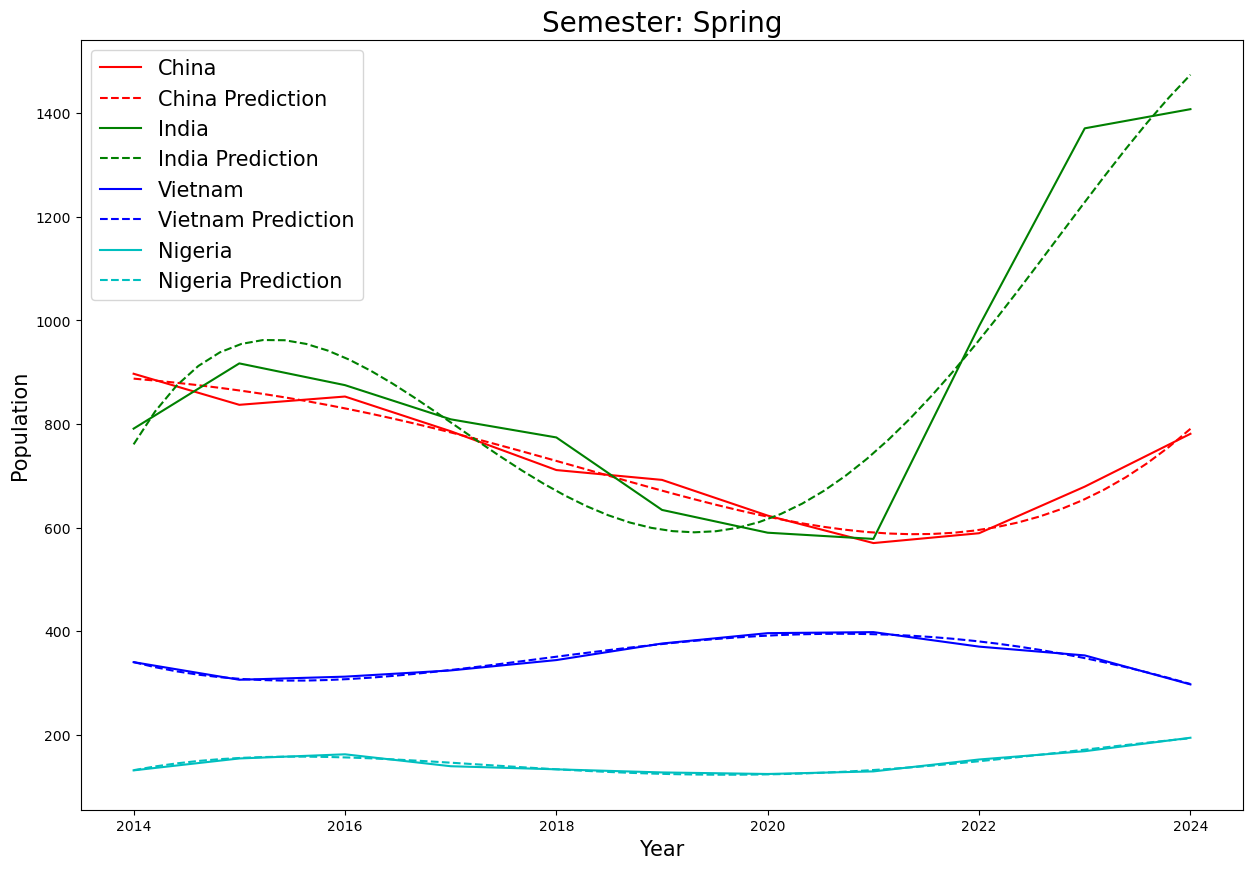

{'China': array([1028.48608398, 1396.57958984, 1926.53417969]),
 'India': array([1603.2734375, 1491.609375 ,  989.4453125]),
 'Vietnam': array([232.36206055, 155.75390625,  74.07788086]),
 'Nigeria': array([206.72705078, 201.63891602, 164.89672852])}

In [81]:
international_prediction('Spring', 4, ['China', 'India', 'Vietnam', 'Nigeria'])

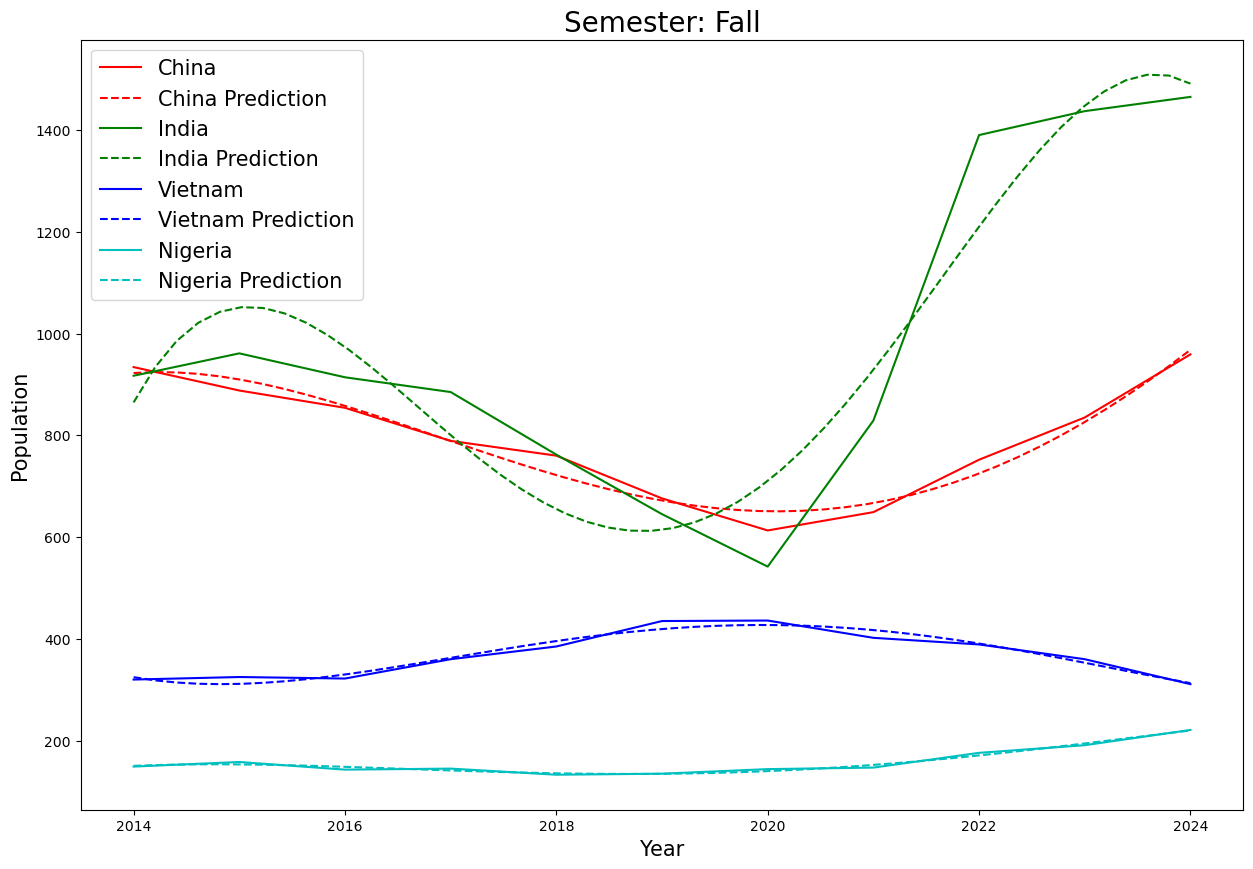

{'China': array([1144.51904297, 1346.43847656, 1560.70361328]),
 'India': array([ 1142.05078125,   157.8671875 , -1750.3984375 ]),
 'Vietnam': array([283.60595703, 281.38720703, 326.76025391]),
 'Nigeria': array([243.72741699, 260.60681152, 264.48132324])}

In [82]:
international_prediction('Fall', 4, ['China', 'India', 'Vietnam', 'Nigeria'])

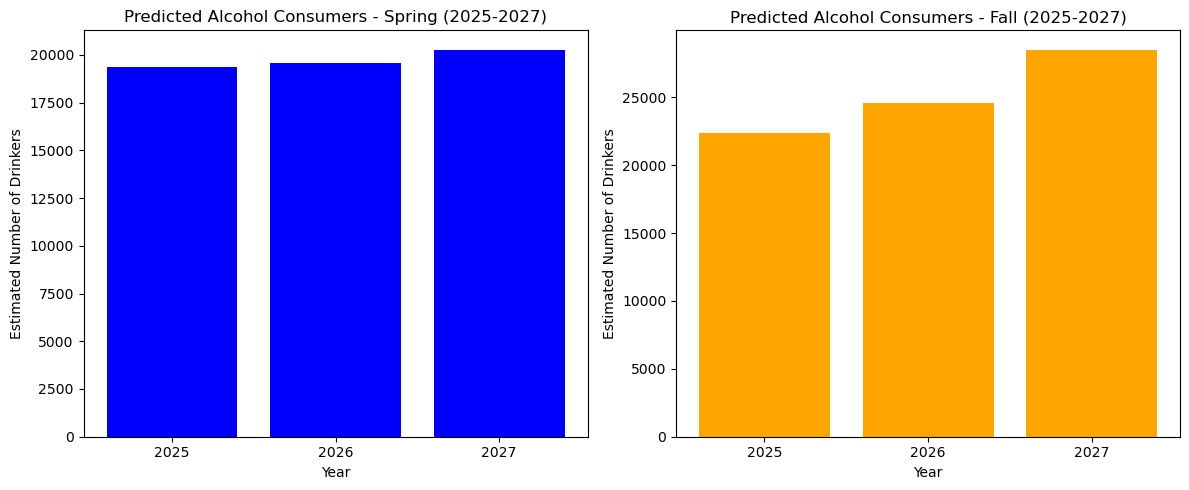

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Predicted undergraduate populations for Spring and Fall semesters by race (taken from prediction above)
spring_race_population = {
    "White": np.array([7660.34, 7336.36, 7282.89]),
    "Hispanic": np.array([15156.95, 16393.73, 18566.88]),
    "African_American": np.array([4990.38, 5103.64, 5167.61]),
    "Asian_American": np.array([8893.10, 7770.02, 5889.97])
}

fall_race_population = {
    "White": np.array([8521.48, 9141.59, 10614.44]),
    "Hispanic": np.array([17771.37, 20547.90, 25194.66]),
    "African_American": np.array([6127.52, 6836.03, 7844.31]),
    "Asian_American": np.array([9819.47, 9204.43, 8247.47])
}

# Predicted total male and female populations for Spring and Fall semesters (see code above)
spring_gender_population = {
    "Undergrad_Male": np.array([17092.06, 18359.07, 20702.71]),
    "Undergrad_Female": np.array([18331.70, 19088.24, 20408.11])
}

fall_gender_population = {
    "Undergrad_Male": np.array([20080.03, 23059.21, 28036.54]),
    "Undergrad_Female": np.array([21346.73, 23815.16, 27919.32])
}

# Compute gender proportions
spring_male_ratio = spring_gender_population["Undergrad_Male"] / (
    spring_gender_population["Undergrad_Male"] + spring_gender_population["Undergrad_Female"])
spring_female_ratio = 1 - spring_male_ratio

fall_male_ratio = fall_gender_population["Undergrad_Male"] / (
    fall_gender_population["Undergrad_Male"] + fall_gender_population["Undergrad_Female"])
fall_female_ratio = 1 - fall_male_ratio

# Adjust race populations based on gender proportions
spring_adjusted_population = {}
fall_adjusted_population = {}

for race in spring_race_population:
    spring_adjusted_population[race] = {
        "Male": spring_race_population[race] * spring_male_ratio,
        "Female": spring_race_population[race] * spring_female_ratio
    }

for race in fall_race_population:
    fall_adjusted_population[race] = {
        "Male": fall_race_population[race] * fall_male_ratio,
        "Female": fall_race_population[race] * fall_female_ratio
    }

# Drinking probabilities based on gender and race

drinking_probs = {
    "White": {"Male": 0.68 , "Female": 0.68},
    "Hispanic": {"Male": 0.60, "Female": 0.57},
    "African_American": {"Male": 0.52 , "Female": 0.48},
    "Asian_American": {"Male": 0.318, "Female": 0.318}
}

# Function to estimate the number of drinkers
def estimate_drinkers(population, drinking_probs):
    total_drinkers = 0
    for race, gender_data in population.items():
        for gender, pop in gender_data.items():
            total_drinkers += np.sum(pop * drinking_probs[race][gender])
    return total_drinkers

# Compute the estimated number of drinkers for Spring and Fall
spring_drinkers = [estimate_drinkers({race: {gender: spring_adjusted_population[race][gender][i] 
                                              for gender in spring_adjusted_population[race]} 
                                       for race in spring_adjusted_population}, 
                                     drinking_probs) 
                    for i in range(3)]

fall_drinkers = [estimate_drinkers({race: {gender: fall_adjusted_population[race][gender][i] 
                                            for gender in fall_adjusted_population[race]} 
                                     for race in fall_adjusted_population}, 
                                   drinking_probs) 
                  for i in range(3)]

# Plot the estimated number of drinkers
plt.figure(figsize=(12, 5))

# Spring Semester Chart
plt.subplot(1, 2, 1)
plt.bar(["2025", "2026", "2027"], spring_drinkers, color='blue')
plt.xlabel("Year")
plt.ylabel("Estimated Number of Drinkers")
plt.title("Predicted Alcohol Consumers - Spring (2025-2027)")

# Fall Semester Chart
plt.subplot(1, 2, 2)
plt.bar(["2025", "2026", "2027"], fall_drinkers, color='orange')
plt.xlabel("Year")
plt.ylabel("Estimated Number of Drinkers")
plt.title("Predicted Alcohol Consumers - Fall (2025-2027)")

plt.tight_layout()
plt.show()
